In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Imputer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import collections

## Train Data!
---

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.drop(columns=['Ticket', 'Name', 'Cabin', 'Embarked'], inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [5]:
def check_missing_data(df):
    columns = df.columns
    for i in columns:
        if pd.isna(df[i]).sum(axis = 0) > 0:
            print('Column: {} has {} NaN value'.format(i, pd.isna(df[i]).sum(axis = 0)))
            
check_missing_data(df_train)

Column: Age has 177 NaN value


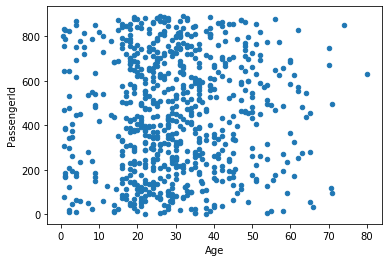

In [6]:
df_train.plot.scatter('Age', 'PassengerId')

In [7]:
# Fill Values
#df_train['Age'][df_train.Age > 0].mean()
df_train['Age'] = df_train['Age'].fillna(value=df_train['Age'][df_train.Age > 0].mean())
check_missing_data(df_train)

In [8]:
# Forecasters
forecasters_train = df_train.iloc[:, 2:7].values
forecasters_train

array([[3, 'male', 22.0, 1, 0],
       [1, 'female', 38.0, 1, 0],
       [3, 'female', 26.0, 0, 0],
       ...,
       [3, 'female', 29.69911764705882, 1, 2],
       [1, 'male', 26.0, 0, 0],
       [3, 'male', 32.0, 0, 0]], dtype=object)

In [9]:
# Classes
classes_train = df_train.iloc[:, 1].values
classes_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [10]:
# LABEL ENCODER
forecasters_label_encoder = LabelEncoder()
forecasters_train[:, 0] = forecasters_label_encoder.fit_transform(forecasters_train[:, 0])
forecasters_train[:, 1] = forecasters_label_encoder.fit_transform(forecasters_train[:, 1])
forecasters_train[:, 3] = forecasters_label_encoder.fit_transform(forecasters_train[:, 3])
forecasters_train[:, 4] = forecasters_label_encoder.fit_transform(forecasters_train[:, 4])
forecasters_train

array([[2, 1, 22.0, 1, 0],
       [0, 0, 38.0, 1, 0],
       [2, 0, 26.0, 0, 0],
       ...,
       [2, 0, 29.69911764705882, 1, 2],
       [0, 1, 26.0, 0, 0],
       [2, 1, 32.0, 0, 0]], dtype=object)

In [49]:
# SCALING
scaler = StandardScaler()
forecasters_train = scaler.fit_transform(forecasters_train)
forecasters_train

array([[ 0.82737724,  0.73769513, -0.5924806 ,  0.49004387, -0.47367361],
       [-1.56610693, -1.35557354,  0.63878901,  0.49004387, -0.47367361],
       [ 0.82737724, -1.35557354, -0.2846632 , -0.50455542, -0.47367361],
       ...,
       [ 0.82737724, -1.35557354,  0.        ,  0.49004387,  2.00893337],
       [-1.56610693,  0.73769513, -0.2846632 , -0.50455542, -0.47367361],
       [ 0.82737724,  0.73769513,  0.17706291, -0.50455542, -0.47367361]])

## Test Data!
---

In [11]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_test_class = pd.read_csv('gender_submission.csv')
df_test_class.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
df_test.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [14]:
check_missing_data(df_test)

Column: Age has 86 NaN value
Column: Fare has 1 NaN value


In [15]:
#df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
df_test['Age'] = df_test['Age'].fillna(value=df_test['Age'][df_test.Age > 0].mean())
#df_test['Age'][df_test.Age > 0].mean()
df_test['Fare'] = df_test['Fare'].fillna(value=df_test['Fare'][df_test.Age < 500].mean())
check_missing_data(df_test)

In [16]:
forecasters_test = df_test.iloc[:, 1:6].values
forecasters_test

array([[3, 'male', 34.5, 0, 0],
       [3, 'female', 47.0, 1, 0],
       [2, 'male', 62.0, 0, 0],
       ...,
       [3, 'male', 38.5, 0, 0],
       [3, 'male', 30.272590361445783, 0, 0],
       [3, 'male', 30.272590361445783, 1, 1]], dtype=object)

In [17]:
classes_test= df_test_class.iloc[:, 1].values
classes_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
# LABEL ENCODER
forecasters_test_label_encoder = LabelEncoder()
forecasters_test[:, 0] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 0])
forecasters_test[:, 1] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 1])
forecasters_test[:, 3] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 3])
forecasters_test[:, 4] = forecasters_test_label_encoder.fit_transform(forecasters_test[:, 4])
forecasters_test

array([[2, 1, 34.5, 0, 0],
       [2, 0, 47.0, 1, 0],
       [1, 1, 62.0, 0, 0],
       ...,
       [2, 1, 38.5, 0, 0],
       [2, 1, 30.272590361445783, 0, 0],
       [2, 1, 30.272590361445783, 1, 1]], dtype=object)

In [50]:
# SCALING
scaler = StandardScaler()
forecasters_test = scaler.fit_transform(forecasters_test)
forecasters_test

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.53218141, -0.42394557],
       [ 0.87348191, -1.32287566,  1.32553003,  0.68340235, -0.42394557],
       [-0.31581919,  0.75592895,  2.51417495, -0.53218141, -0.42394557],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.53218141, -0.42394557],
       [ 0.87348191,  0.75592895,  0.        , -0.53218141, -0.42394557],
       [ 0.87348191,  0.75592895,  0.        ,  0.68340235,  0.68361223]])

In [51]:
estimator = RandomForestClassifier(n_estimators=8, criterion='entropy', random_state=0)
estimator.fit(forecasters_train, classes_train)
predictions = estimator.predict(forecasters_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [52]:
precision = accuracy_score(classes_test, predictions)
print('Precision: {}%'.format(precision * 100))

Precision: 83.01435406698565%


In [53]:
matrix = confusion_matrix(classes_test, predictions)
print('Confusion Matrix:'
  '\n\t0\t1\n0:\t{}\t{}'
  '\n1:\t{}\t{}'.format(matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]))

Confusion Matrix:
	0	1
0:	232	37
1:	34	115


In [54]:
np.savetxt("predictions.csv", predictions, fmt="%d", delimiter=",")